# Vision Based System for Banknote recognition using Deep Learning algorithm

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

Using TensorFlow backend.
c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (25,25), input_shape = (100, 100, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (25, 25), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax')) # 7 units equals amount of output categories

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [3]:
# os.chdir('/content/drive/My Drive/Banknote Code')
# os.getcwd()

In [8]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Banknote Code/dataset',
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Banknote Code/Images',
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical')
classifier.fit_generator(training_set,
    steps_per_epoch = 160,#168
    epochs =30 ,#100
    validation_data = test_set,
    validation_steps = 3)
classifier.summary()

Found 208 images belonging to 6 classes.
Found 142 images belonging to 6 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30





160/160 [==============================] - 705s 4s/step - loss: 1.7266 - acc: 0.2527 - val_loss: 1.9577 - val_acc: 0.2604
Epoch 2/30
160/160 [==============================] - 638s 4s/step - loss: 1.3457 - acc: 0.4531 - val_loss: 1.4869 - val_acc: 0.4744
Epoch 3/30
160/160 [==============================] - 642s 4s/step - loss: 1.2510 - acc: 0.5061 - val_loss: 1.6239 - val_acc: 0.3750
Epoch 4/30
160/160 [==============================] - 655s 4s/step - loss: 1.1290 - acc: 0.5672 - val_loss: 1.9603 - val_acc: 0.4231
Epoch 5/30
160/160 [==============================] - 645s 4s/step - loss: 0.9596 - acc: 0.6373 - val_loss: 1.6090 - val_acc: 0.4615
Epoch 6/30
160/160 [==============================] - 654s 4s/step - loss: 0.9008 - acc: 0.6631 - val_loss: 1.8767 - val_acc: 0.4271
Epoch 7/30
160/160

In [4]:
# serialize weights to pkl
from sklearn.externals import joblib 
#joblib.dump(classifier, 'currency99_1.pkl')

c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Saving and loading the file

In [5]:
# serialize weights to HDF5

# To load saved model
from sklearn.externals import joblib
cnn = joblib.load('currency99_1.pkl') 

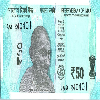

In [7]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image

'''path = 'C:/Users/user 5/Desktop/Banknote/test/2000.jpeg' # Folder with my images
for filename in os.listdir(path):
  if "jpg" in filename:
    test_image = image.load_img(path + filename, target_size = (100, 100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    print(result)'''
import numpy as np
from keras.preprocessing import image
test_images = image.load_img('C:/Users/Sai/Desktop/projects/Vision Based System for Banknote Recognition Using Different Machine Learning and Deep Learning Approach/Banknote Code/test/14.jpg', target_size = (100,100,3))
test_images

In [8]:
test_image = image.img_to_array(test_images)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)

[[1. 0. 0. 0. 0. 0.]]


In [9]:
# training_set.class_indices

In [10]:
# folder = list(training_set.class_indices.keys())[(result[0].argmax())] # Get the index of the highest predicted value
# folder

Currency note is ten 


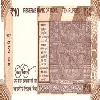

In [19]:
if(result[0][0] == 1):
    print('Currency note is Fifty ')
elif (result[0][1] == 1):
    print('Currency note is Five hundred ')
elif (result[0][2] == 1):
    print('Currency note is hundred ')
elif (result[0][3] == 1):
    print('Currency note is ten ')
elif (result[0][4] == 1):
    print('Currency note is Twenty ')
elif (result[0][5] == 1):
    print('Currency note is Two Thousand ')   
# elif( result[0][6] == 1):
#     print('Currency note is  ')
else:
    print('Invalid currency ')
test_images